<a href="https://colab.research.google.com/github/sarsom/machine_learning/blob/master/video_background_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/BackgroundRemoval/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/BackgroundRemoval


In [2]:
!ls

 Akshay.mp4		   seg_data_release.zip
'[EG_code_data]_release'   utils
 eg_dataset.pickle	   video_background_removal.ipynb
 insight_project


In [0]:
import sys
if sys.version_info >= (3, 0):
    import urllib.request as ulib
else:
    import urllib as ulib
from utils.rawdata_prep import *
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import cv2
from random import shuffle
import urllib

In [10]:
!python ./utils/downloader.py

...100%, 1447 MB, 6524 KB/s, 227 seconds passedStart downloading Images from Flickr .... 
Traceback (most recent call last):
  File "./utils/downloader.py", line 250, in <module>
    dwnld.run()
  File "./utils/downloader.py", line 205, in run
    self.download_jpg(target_flder_dwnld)
  File "./utils/downloader.py", line 172, in download_jpg
    ulib.urlretrieve(img_url, img_path)
  File "/usr/lib/python3.6/urllib/request.py", line 248, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib/python3.6/urllib/request.py", line 223, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 564, in error
    result = self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 5

In [0]:
import urllib.request as ulib
def download_jpg(save_here):
  """
    Download image dataset (jpeg) from flickr urls
  """
  data_path =  "[[]EG_code_data[]]_release/data"
  image_urls = "alldata_urls.txt"
  txt_urls = "{}/{}".format( data_path, image_urls )
  txt_urls = txt_urls.replace('[]', '').replace('[]', '')
    
  img_counter = 0
		
  print("Start downloading Images from Flickr .... ")
		
  with open(txt_urls, "r") as handler:
    for line in handler:
      line = line.strip()
      line = line.split(" ")
      fname, img_url = line[0], line[1]
      print(img_url, img_counter)
      if "http://" in img_url:
        img_path = "{}/{}".format(target_flder_dwnld, fname)
        try:
           ulib.urlretrieve(img_url, img_path)
        except Exception as e:
          print(e)
        img_counter += 1
        if img_counter%50 == 0:
          print("Number of Images downloaded: {}".format(img_counter) )
  
  print("Total Number of images downloaded: {}".format(img_counter))


In [53]:
flder_images = "images"
# download zip file
#self.download_dataset()
		
# Unzip dataset EG file
#self.unzip_file(self.zip_fname)

#create a folder image in the EG/data folder
#self.create_folder(flder_images, self.data_path)

#Check if folder images contains jpg images
img_folder = data_path +"/"+ flder_images +"/*.jpg"
print(img_folder)

if len(glob(img_folder)) != 0:
  #Download image files in images
	target_flder_dwnld = data_path +"/"+ flder_images
	target_flder_dwnld = target_flder_dwnld.replace("[]", "")
	download_jpg(target_flder_dwnld)

  #print(target_flder_dwnld)

print("EG Data acquisition completed!")

[[]EG_code_data[]]_release/data/images/*.jpg
Start downloading Images from Flickr .... 
http://farm6.static.flickr.com/5474/10041446846_49d351873d_b.jpg 0
http://farm6.static.flickr.com/5349/10071117213_8ba4d8dc38_b.jpg 1
http://farm3.static.flickr.com/2894/10073378065_219389c48b_b.jpg 2
http://farm3.static.flickr.com/2858/10076862626_939899417a_b.jpg 3
http://farm4.static.flickr.com/3734/10163480354_a2a057641b_b.jpg 4
http://farm4.static.flickr.com/3786/10174196954_6b8c8a534a_b.jpg 5
http://farm8.static.flickr.com/7363/10249939304_800ac1f40d_b.jpg 6
http://farm3.static.flickr.com/2844/10250152423_bf71b72a3c_b.jpg 7
http://farm6.static.flickr.com/5475/10353781723_dd98520c34_b.jpg 8
http://farm6.static.flickr.com/5538/10369981764_5dd4d178fd_b.jpg 9
http://farm3.static.flickr.com/2808/10372112794_aca32cf986_b.jpg 10
http://farm3.static.flickr.com/2854/10378712365_22117dce97_b.jpg 11
http://farm8.static.flickr.com/7321/10445580556_e2697ca286_b.jpg 12
http://farm4.static.flickr.com/3684/10

In [54]:
eg_prep = EGDataset()
eg_prep.build_dataset() #save the pickle file "eg_dataset.pickle"

Check saved Dataset: .... 
No error found!
EG dataset saved in `eg_dataset.pickle`.


In [55]:
#load dataset
with open("eg_dataset.pickle", 'rb') as handle:
    dataset = pickle.load(handle)
    

dataset_sz = len(dataset)

print("Size dataset: {}".format(dataset_sz))

Size dataset: 1588


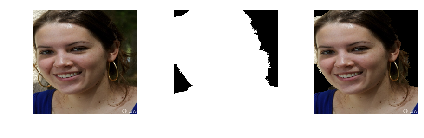

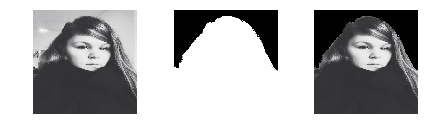

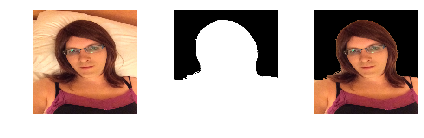

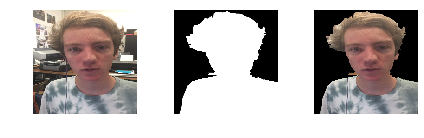

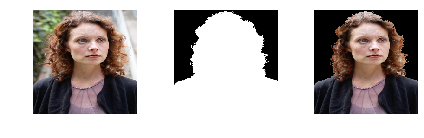

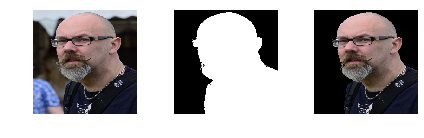

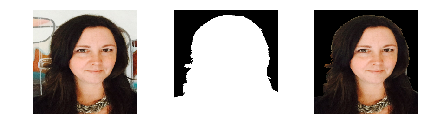

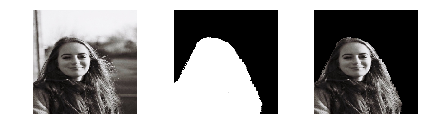

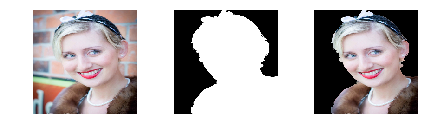

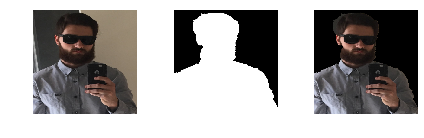

In [56]:
 def read_mask_mat(mat_fname, mask_sz):
    """
    extract mask as a binary image array
        :mat_fname: str
        :mask_sz: tuple
    """
    mat = loadmat(mat_fname)
    mask = mat["mask"]
    mask = mask.astype( np.float32 )
    mask_rsz = cv2.resize(mask, mask_sz)
    mask_rsz = np.expand_dims(mask_rsz, axis=2)
    return mask_rsz


def read_image_file(img_fname, crop, img_input_sz):
    """
    read raw image, resize and output array
    """
    bgr = cv2.imread( img_fname )
    rgb = bgr[:, :, ::-1]
    if np.sum(crop) != 0: #image must be cropped
        assert len(crop)==4, "crop specs list must be of length 4"
        yi, yf, xi, xf = crop
        rgb = rgb[yi:yf, xi:xf, :]
    
    rgb_rsz = cv2.resize(rgb, (600, 800))
    img_rsz = cv2.resize(rgb_rsz, img_input_sz)
    return img_rsz


examples_id = np.random.choice(range(dataset_sz), 10)

mask_sz, img_input_sz = (224, 224), (224, 224) # The model takes images of that size

for idx in examples_id:
    example = dataset[idx]
    mask = read_mask_mat(example["mask"], mask_sz)
    img = read_image_file(example["img"], example["crop"], img_input_sz)
    combo = mask * img
    f, ax = plt.subplots(1, 3)
    ax[0].imshow(img)
    ax[1].imshow(mask[:,:,0], cmap="gray")
    ax[2].imshow(combo.astype("uint8"))
    ax[0].axis("off"), ax[1].axis("off"), ax[2].axis("off")
    plt.tight_layout()
    plt.show()

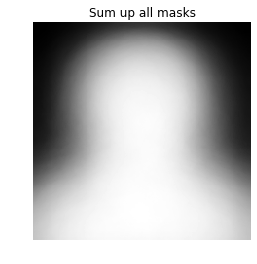

In [57]:
avg_mask = np.zeros((mask_sz[0], mask_sz[1], 1))
for exple in dataset:
    mat_p = exple["mask"]
    img = read_mask_mat(mat_p, img_input_sz)
    avg_mask += img
    plt.axis("off")
plt.imshow(avg_mask[:,:,0], cmap="gray")
plt.title("Sum up all masks")
plt.show()

In [58]:
split_ratio = 0.8 

indexes = [i for i in range(dataset_sz)]
random.shuffle(indexes)
split_idx = int( dataset_sz * split_ratio )
train_indexes = indexes[0:split_idx]
train_sz = len(train_indexes)
valid_indexes = indexes[split_idx::]
valid_sz = len(valid_indexes)

print("Training set size {} | Validation set size {}".format(train_sz, valid_sz))

Training set size 1270 | Validation set size 318


In [0]:
def read_img(img_path, crop_specs, input_sz=(224, 224)):
    """
    Read image file and return cropped, resized, intensity-normalized array
        Arguments
            :img_path: str
            :crop_specs: list
            :input_sz: tuple
        Output
            :rgb_norm: numpy array
    """
    bgr = cv2.imread(img_path)
    rgb = bgr[:,:,::-1]
    if len(crop_specs) == 4:
        rgb = rgb[ crop_specs[0]:crop_specs[1], crop_specs[2]:crop_specs[3], :]
    rgb = cv2.resize(rgb, (600, 800))
    rgb = cv2.resize(rgb, input_sz)
    rgb_norm = rgb.astype(np.float32)/ 255.
    
    return rgb_norm



def read_mask(mask_path, input_sz=(224, 224)):
    """
    Read mat file with binary mask and returns an array of rank 3
        Arguments
            :mask_path: str
            :input_sz: tuple
        Output
            :mask: numpy array
    """
    mask_mat = loadmat( mask_path )
    mask = mask_mat["mask"]
    mask = cv2.resize(mask, (224, 224))
    mask = np.expand_dims(mask, axis=2)
    
    return mask



def batch_gen(batch_sz, indexes, dataset, is_training):
    """
    """
    idx = 0 # pointer for indexes
    
    while 1:
        if is_training: shuffle(indexes)
        x_batch = np.zeros( (batch_sz, 224, 224, 3), dtype=np.float32)
        y_batch = np.zeros( (batch_sz, 224, 224, 1), dtype=np.float32)
        
        for row in range(batch_sz):
            example = dataset[indexes[idx]]
            crop_specs = example["crop"]
            img_path = example["img"]
            mask_path = example["mask"]
            rgb_norm = read_img(img_path, crop_specs)
            mask = read_mask(mask_path)
            x_batch[row] = rgb_norm[:,:,:]
            y_batch[row] = mask[:, :, :]
            idx += 1
            if (idx > len(indexes)-1):
                shuffle(indexes)
                idx = 0

        yield x_batch, y_batch

In [60]:
import keras
import keras.backend as K
from keras import Input
from keras.optimizers import Adam
from keras.engine import Model
from keras.layers import BatchNormalization, Activation, Conv2D, concatenate, Conv2DTranspose, UpSampling2D
#from keras.applications.mobilenet import DepthwiseConv2D
from keras.layers import DepthwiseConv2D
from keras.applications import mobilenet
#import loss
#from layers.BilinearUpSampling import BilinearUpSampling2D
print("Keras Version ", keras.__version__)
print("Using GPU? ", K.tensorflow_backend._get_available_gpus() )

def relu6(x):
    return K.relu(x, max_value=6)


def _conv_block(inputs, filters, alpha, kernel=(3, 3), strides=(1, 1), block_id=1):
    """Adds an initial convolution layer (with batch normalization and relu6).

    # Arguments
        inputs: Input tensor of shape `(rows, cols, 3)`
            (with `channels_last` data format) or
            (3, rows, cols) (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 32.
            E.g. `(224, 224, 3)` would be one valid value.
        filters: Integer, the dimensionality of the output space
            (i.e. the number output of filters in the convolution).
        alpha: controls the width of the network.
            - If `alpha` < 1.0, proportionally decreases the number
                of filters in each layer.
            - If `alpha` > 1.0, proportionally increases the number
                of filters in each layer.
            - If `alpha` = 1, default number of filters from the paper
                 are used at each layer.
        kernel: An integer or tuple/list of 2 integers, specifying the
            width and height of the 2D convolution window.
            Can be a single integer to specify the same value for
            all spatial dimensions.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.

    # Input shape
        4D tensor with shape:
        `(samples, channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, rows, cols, channels)` if data_format='channels_last'.

    # Output shape
        4D tensor with shape:
        `(samples, filters, new_rows, new_cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, new_rows, new_cols, filters)` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to stride.

    # Returns
        Output tensor of block.
    """
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    filters = int(filters * alpha)
    x = Conv2D(filters, kernel,
               padding='same',
               use_bias=False,
               strides=strides,
               name='conv_%d' % block_id)(inputs)
    x = BatchNormalization(axis=channel_axis, name='conv_%d_bn' % block_id)(x)
    return Activation(relu6, name='conv_%d_relu' % block_id)(x)


def _depthwise_conv_block(inputs, pointwise_conv_filters, alpha,
                          depth_multiplier=1, strides=(1, 1), block_id=1):
    """Adds a depthwise convolution block.

    A depthwise convolution block consists of a depthwise conv,
    batch normalization, relu6, pointwise convolution,
    batch normalization and relu6 activation.

    # Arguments
        inputs: Input tensor of shape `(rows, cols, channels)`
            (with `channels_last` data format) or
            (channels, rows, cols) (with `channels_first` data format).
        pointwise_conv_filters: Integer, the dimensionality of the output space
            (i.e. the number output of filters in the pointwise convolution).
        alpha: controls the width of the network.
            - If `alpha` < 1.0, proportionally decreases the number
                of filters in each layer.
            - If `alpha` > 1.0, proportionally increases the number
                of filters in each layer.
            - If `alpha` = 1, default number of filters from the paper
                 are used at each layer.
        depth_multiplier: The number of depthwise convolution output channels
            for each input channel.
            The total number of depthwise convolution output
            channels will be equal to `filters_in * depth_multiplier`.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.
        block_id: Integer, a unique identification designating the block number.

    # Input shape
        4D tensor with shape:
        `(batch, channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, rows, cols, channels)` if data_format='channels_last'.


    # Output shape
        4D tensor with shape:
        `(batch, filters, new_rows, new_cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, new_rows, new_cols, filters)` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to stride.

    # Returns
        Output tensor of block.
    """
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    pointwise_conv_filters = int(pointwise_conv_filters * alpha)

    x = DepthwiseConv2D((3, 3),
                        padding='same',
                        depth_multiplier=depth_multiplier,
                        strides=strides,
                        use_bias=False,
                        name='conv_dw_%d' % block_id)(inputs)
    x = BatchNormalization(axis=channel_axis, name='conv_dw_%d_bn' % block_id)(x)
    x = Activation(relu6, name='conv_dw_%d_relu' % block_id)(x)

    x = Conv2D(pointwise_conv_filters, (1, 1),
               padding='same',
               use_bias=False,
               strides=(1, 1),
               name='conv_pw_%d' % block_id)(x)
    x = BatchNormalization(axis=channel_axis, name='conv_pw_%d_bn' % block_id)(x)
    return Activation(relu6, name='conv_pw_%d_relu' % block_id)(x)


def MobileUNet(input_shape=None,
               alpha=1.0,
               alpha_up=1.0,
               depth_multiplier=1,
               dropout=1e-3,
               input_tensor=None):
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    b00 = _conv_block(img_input, 32, alpha, strides=(2, 2), block_id=0) # ==> 56
    b01 = _depthwise_conv_block(b00, 64, alpha, depth_multiplier, block_id=1) # ==> 28

    b02 = _depthwise_conv_block(b01, 128, alpha, depth_multiplier, block_id=2, strides=(2, 2)) # ==> 14
    b03 = _depthwise_conv_block(b02, 128, alpha, depth_multiplier, block_id=3)

    b04 = _depthwise_conv_block(b03, 256, alpha, depth_multiplier, block_id=4, strides=(2, 2))
    b05 = _depthwise_conv_block(b04, 256, alpha, depth_multiplier, block_id=5)

    b06 = _depthwise_conv_block(b05, 512, alpha, depth_multiplier, block_id=6, strides=(2, 2))
    b07 = _depthwise_conv_block(b06, 512, alpha, depth_multiplier, block_id=7)
    b08 = _depthwise_conv_block(b07, 512, alpha, depth_multiplier, block_id=8)
    b09 = _depthwise_conv_block(b08, 512, alpha, depth_multiplier, block_id=9)
    b10 = _depthwise_conv_block(b09, 512, alpha, depth_multiplier, block_id=10)
    b11 = _depthwise_conv_block(b10, 512, alpha, depth_multiplier, block_id=11)

    b12 = _depthwise_conv_block(b11, 1024, alpha, depth_multiplier, block_id=12, strides=(2, 2))
    b13 = _depthwise_conv_block(b12, 1024, alpha, depth_multiplier, block_id=13)
    # b13 = Dropout(dropout)(b13)

    filters = int(512 * alpha)
    up1 = concatenate([
        Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(b13),
        b11,
    ], axis=3)
    b14 = _depthwise_conv_block(up1, filters, alpha_up, depth_multiplier, block_id=14)

    filters = int(256 * alpha)
    up2 = concatenate([
        Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(b14),
        b05,
    ], axis=3)
    b15 = _depthwise_conv_block(up2, filters, alpha_up, depth_multiplier, block_id=15)

    filters = int(128 * alpha)
    up3 = concatenate([
        Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(b15),
        b03,
    ], axis=3)
    b16 = _depthwise_conv_block(up3, filters, alpha_up, depth_multiplier, block_id=16)

    filters = int(64 * alpha)
    up4 = concatenate([
        Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(b16),
        b01,
    ], axis=3)
    b17 = _depthwise_conv_block(up4, filters, alpha_up, depth_multiplier, block_id=17)

    filters = int(32 * alpha)
    up5 = concatenate([b17, b00], axis=3)
    # b18 = _depthwise_conv_block(up5, filters, alpha_up, depth_multiplier, block_id=18)
    b18 = _conv_block(up5, filters, alpha_up, block_id=18)

    x = Conv2D(1, (1, 1), kernel_initializer='he_normal', activation='linear')(b18)
    #x = BilinearUpSampling2D(size=(2, 2))(x)
    x = UpSampling2D(size=(2, 2))(x)
    x = Activation('sigmoid')(x)

    model = Model(img_input, x)

    return model

Using TensorFlow backend.


Keras Version  2.2.5




Using GPU?  ['/job:localhost/replica:0/task:0/device:GPU:0']


In [61]:
batch_sz = 5
n_epochs = 40
    
model = MobileUNet(input_shape=(img_input_sz[0], img_input_sz[1], 3), alpha=1, alpha_up=1, depth_multiplier=1)
adam = Adam(lr=0.001)
model.compile(loss = "binary_crossentropy", optimizer = adam)

steps_per_epoch = len(train_indexes) // batch_sz
validation_steps = len(valid_indexes) // batch_sz

history = model.fit_generator( generator=batch_gen(batch_sz, train_indexes, dataset, is_training=1),\
        validation_data=batch_gen(batch_sz, valid_indexes, dataset, is_training=0),\
        steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, epochs=n_epochs,\
        verbose=True)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40
254/254 [==============================] - 88s 347ms/step - loss: 0.3425 - val_loss: 1.4957
Epoch 2/40
254/254 [==============================] - 75s 294ms/step - loss: 0.2693 - val_loss: 0.3086
Epoch 3/40
254/254 [==============================] - 75s 295ms/step - loss: 0.2351 - val_loss: 0.4221
Epoch 4/40
254/254 [==============================] - 75s 296ms/step - loss: 0.1961 - val_loss: 0.2864
Epoch 5/40
254/254 [==============================] - 75s 295ms/step - loss: 0.1714 - val_loss: 0.3666
Epoch 6/40
254/254 [==============================] - 78s 305ms/step - loss: 0.1568 - val_loss: 0.2318
Epoch 7/40
254/254 [==============================] - 76s 299ms/step - loss: 0.1339 - val_loss: 0.1867
Epoch 8/40
254/254 [==============================] - 73s 286ms/step - loss: 0.1235 - val_loss: 0.1645
Epoch 9/40
254/254 [==============================] - 73s 289ms/step - loss: 0

In [0]:
model.save('my_model.h5')

In [90]:
output_path = keras.models.save_model(model, 'my_model.h5',overwrite=True)
#keras.models.load_model('my_model.h5')
with CustomObjectScope({'relu6': keras.layers.ReLU,'DepthwiseConv2D': keras.layers.DepthwiseConv2D}):
  model = keras.models.load_model('my_model.h5')
#tf.contrib.saved_model.save_keras_model(model, './tmp_dir')
#loaded_model = tf.contrib.saved_model.load_keras_model(output_path)

TypeError: ignored

In [0]:
import sys
if sys.version_info >= (3, 0):
    import urllib.request as ulib
else:
    import urllib as ulib
#from utils.rawdata_prep import *
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import cv2
from random import shuffle
import urllib
import os
import sys
import time
import json
from glob import glob
import zipfile


In [0]:

def reporthook(count, block_size, total_size):
  """
	Show progress bar during file download
	"""
  global start_time
  if count == 0:
    start_time = time.time()
    return
  duration = time.time() - start_time
  progress_size = int(count * block_size)
  speed = int(progress_size / (1024 * duration))
  percent = int(count * block_size * 100 / total_size)
  
  sys.stdout.write("\r...%d%%, %d MB, %d KB/s, %d seconds passed" %
			(percent, progress_size / (1024 * 1024), speed, duration))
  sys.stdout.flush()
  time.sleep(0.001)

In [5]:
!python --version
#dwnld = DownloadEG()
#dwnld.run()
url = "https://www.dropbox.com/s/clilqfoutwe1aed/seg_data_release.zip?dl=0"
#url= "https://www.dropbox.com/sh/yn7ufeunkrzi2eh/AACzu6kEvqqI3BV02UJPPV9Ma?dl=0"
#url = "https://www.dropbox.com/preview/Data/%5BEG_code_data%5D_release.zip?role=personal"
file_name = "seg_data_release.zip"
#urllib.urlretrieve() (url, fname)
import urllib.request as ulib
import shutil
try:
  ulib.urlretrieve(url, file_name, reporthook)
except ulib.HTTPError as e:
    print('The server couldn\'t fulfill the request.')
    print('Error code: ', e.code)
except ulib.URLError as e:
    print('We failed to reach a server.')
    print('Reason: ', e.reason)
    print (e)
else:
  print("HEEHEHE")

    
!ls -al 


Python 3.6.8
...-25395200%, 0 MB, 3065 KB/s, 0 seconds passedHEEHEHE
total 12039
-rw------- 1 root root 11797001 Sep 20 14:11  Akshay.mp4
-rw------- 1 root root     6810 Sep 20 10:42 '[EG_code_data]_release.zip'
drwx------ 6 root root     4096 Sep 19 07:26  insight_project
-rw------- 1 root root   251311 Sep 20 10:48  seg_data_release
-rw------- 1 root root   251311 Sep 20 16:52  seg_data_release.zip
-rw------- 1 root root    16242 Sep 20 16:49  video_background_removal.ipynb


In [8]:
# Download the file from `url` and save it locally under `file_name`:
'''with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    cv2.waitKey()
    print(os.listdir())
''' 

"with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:\n    shutil.copyfileobj(response, out_file)\n    cv2.waitKey()\n    print(os.listdir())\n"

In [9]:
!unzip '[EG_code_data]_release.zip'

Archive:  [EG_code_data]_release.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of [EG_code_data]_release.zip or
        [EG_code_data]_release.zip.zip, and cannot find [EG_code_data]_release.zip.ZIP, period.

No zipfiles found.


In [91]:
cap = cv2.VideoCapture(0)
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    cv2.imshow('Frame',frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

Error opening video stream or file


In [0]:
import numpy as np
import IPython
def image_from_array(img_array, format='png'):
    IPython.display.Video(img_array) 

In [12]:
!ls "/gdrive/My Drive/BackgroundRemoval/Akshay.mp4"


'/gdrive/My Drive/BackgroundRemoval/Akshay.mp4'


1111
2222
3333


TypeError: ignored

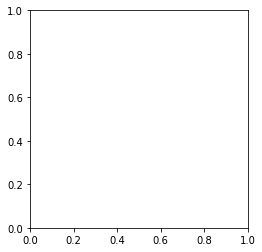

In [233]:
from IPython.display import Image
from  matplotlib  import  pyplot  as  plt
from keras.applications import MobileNet
import keras
from keras.applications.mobilenet import preprocess_input
from keras.applications import imagenet_utils
#from keras.applications.mobilenet import relu6

VIDEO_STREAM = "/gdrive/My Drive/BackgroundRemoval/Akshay.mp4"
try:
   vs = cv2.VideoCapture(VIDEO_STREAM)
except Exception as  e:
  print(e)

(grabbed, frame) = vs.read()
# If the frame was not grabbed, then we have reached the end
# of the stream
if not grabbed:
  print ("Not grabbed.")

img_clone = frame = cv2.resize(frame, (224, 224))
crop_image = frame #frame[y:y+h, x:x+w]
pframe = np.expand_dims(crop_image, axis=0)
norm_frame = pframe = preprocess_input(pframe)
print("1111")
norm_frame = cv2.normalize(pframe, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print("2222")

pred_mask = model.predict(norm_frame)
#plt.imshow(norm_frame)
mask = np.multiply(img_clone,pred_mask)
print("3333")


#res = cv2.bitwise_and(img_clone, img_clone, mask = mask)
plt.imshow(mask)

img_3 = np.zeros([224,224,3],dtype=np.uint8)
img_3.fill(255)
#res = np.add(img_3, res)
#
#result = np.bitwise_and(mask, img_clone, casting='same_kind', dtype=np.int)
#
#plt.imshow(res)


In [191]:
#os.chdir("/content/drive/My Drive/Colab Notebooks/MRCNN_pure")
sys.path.append("/content/drive/My Drive/Colab Notebooks/MRCNN_pure")
VIDEO_STREAM = "/content/drive/My Drive/Colab Notebooks/Millery.avi"
VIDEO_STREAM_OUT = "/content/drive/My Drive/Colab Notebooks/Result.avi"
# Root directory of the project
ROOT_DIR = os.path.abspath(".")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
def display_instances(image, boxes, masks, ids, names, scores):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = visualize.random_colors(n_instances)
    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]
    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue
        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]
        image = visualize.apply_mask(image, mask, color)
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
        )
    return image
config = InferenceConfig()
config.display()
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
# Initialize the video stream and pointer to output video file
vs = cv2.VideoCapture(VIDEO_STREAM)
writer = None
vs.set(cv2.CAP_PROP_POS_FRAMES, 1000);
i = 0
while i < 20000:
  # read the next frame from the file
  (grabbed, frame) = vs.read()
  i += 1
  # If the frame was not grabbed, then we have reached the end
  # of the stream
  if not grabbed:
    print ("Not grabbed.")
    break;
  # Run detection
  results = model.detect([frame], verbose=1)
  # Visualize results
  r = results[0]
  masked_frame = display_instances(frame, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])
  # Check if the video writer is None
  if writer is None:
    # Initialize our video writer
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    writer = cv2.VideoWriter(VIDEO_STREAM_OUT, fourcc, 30,
      (masked_frame.shape[1], masked_frame.shape[0]), True)
  # Write the output frame to disk
  writer.write(masked_frame)
# Release the file pointers
print("[INFO] cleaning up...")
writer.release()

ModuleNotFoundError: ignored